In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
# read the dataset
dataset = pd.read_csv('student_scores.csv')

In [ ]:
print(dataset.shape)

(25, 2)


In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


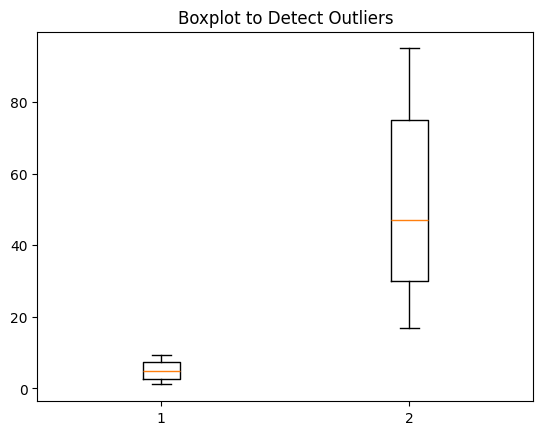

In [ ]:
plt.boxplot(dataset)
# plt.title('Boxplot to Detect Outliers')
# plt.show()
plt.title('Boxplot to Detect Outliers')
plt.show()

**Koushik**

**Hours** - column

In [ ]:
Q3 = dataset.Hours.quantile(0.75)

In [ ]:
Q1 = dataset.Hours.quantile(0.25)

In [ ]:
IQR = Q3 - Q1

In [ ]:
Upper_threshold = Q3 + 1.5*IQR
Lower_threshold = Q1 - 1.5*IQR
Upper_threshold,Lower_threshold

(14.450000000000001, -4.3500000000000005)

**Scores**-column

In [ ]:
Q3_scores = dataset.Scores.quantile(0.75)
Q1_scores = dataset.Scores.quantile(0.25)
IQR_scores = Q3_scores - Q1_scores
Upper_threshold_scores = Q3_scores + 1.5*IQR_scores
Lower_threshold_scores = Q1_scores - 1.5*IQR_scores
Upper_threshold_scores,Lower_threshold_scores

(142.5, -37.5)

**Chatgpt**

In [ ]:
dataset_array = np.array(dataset)

In [ ]:
Q1 = np.percentile(dataset_array,25)
Q3 = np.percentile(dataset_array,75)
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
# Identify Outliers
outliers = dataset_array[(dataset_array<lower_bound) | (dataset_array > upper_bound)]

In [ ]:
print("IQR Method")
print(f"Lower Bound :{lower_bound},Upper bound :{upper_bound}")
print(f"Outliers detected: {outliers}")

IQR Method
Lower Bound :-56.4375,Upper bound :107.0625
Outliers detected: []


In [ ]:
skewness_value = skew(dataset)
print(f"skewness_value: {skewness_value}")

skewness_value: [0.17872206 0.21968605]


In [ ]:
if (skewness_value>0).all():
  print("The data is positively skewed")
elif (skewness_value<0).all():
  print("The data is negatively skewed")
else:
  print("The data is symmetric")

The data is positively skewed


In [ ]:
print(dataset)
print(type(dataset))

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(type(skewness_value))
print(skewness_value)


<class 'numpy.ndarray'>
[0.17872206 0.21968605]


In [ ]:
dataset.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.dtypes

,0
Hours,float64
Scores,int64


Meadian and mean are close to each other - there is less skew in the data


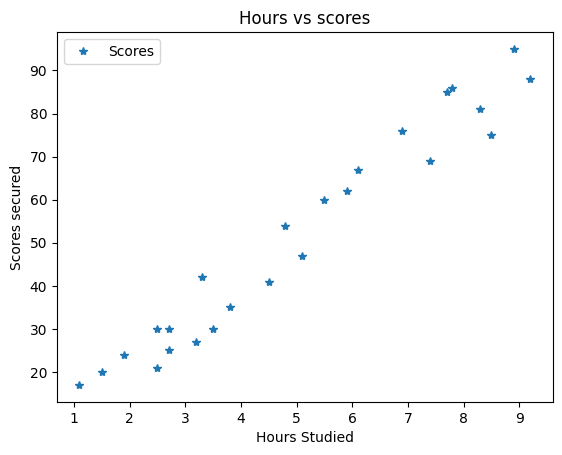

In [ ]:
dataset.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores secured')
plt.show()

In [ ]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*   There is a linear relationship between hours and score
*   We can go ahead and develop linear regression model
*   No transformation required

**Preparing the data**

In [ ]:
x = dataset.loc[:,['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:,['Scores']].values  # target as arrays
from sklearn.model_selection import train_test_split  #import the required function
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train.shape,x_test.shape

((18, 1), (7, 1))

**Normalising/Scaling the data**

In [ ]:
# from sklearn.preprocessing import StandardScaler  # import the required function
# scaler = StandardScaler()   # Initialize
# scaler.fit(x_train)   # find the values of mu and sigma
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
# I want to scale the data between 0 to 1
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# # x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[2.5],
       [5.1],
       [8.9],
       [7.8],
       [1.5],
       [2.7],
       [8.3]])

In [ ]:
x_train

array([[4.5],
       [3.5],
       [6.1],
       [3.8],
       [2.7],
       [6.9],
       [5.5],
       [4.8],
       [3.3],
       [8.5],
       [5.9],
       [7.4],
       [9.2],
       [2.5],
       [3.2],
       [7.7],
       [1.9],
       [1.1]])

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression   #Importing all the required function
regressor = LinearRegression()    # Initialize the object for the class-LinearRegression
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_) # C

[3.36624109]


In [ ]:
print(regressor.coef_)  # m - Slope

[[9.51873063]]


In [ ]:
regressor.predict([[5]])

array([[50.95989422]])

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([[27.16306765],
       [51.91176728],
       [88.08294366],
       [77.61233997],
       [17.64433703],
       [29.06681378],
       [82.37170528]])

In [ ]:
print(y_test.shape)
print(y_pred.shape)


(7, 1)
(7, 1)


In [ ]:
y_test = y_test.flatten()
y_pred = y_pred.flatten()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      30  27.163068
1      47  51.911767
2      95  88.082944
3      86  77.612340
4      20  17.644337
5      25  29.066814
6      81  82.371705


**Metrics**

In [ ]:
from sklearn import metrics
print('R2 score:',metrics.r2_score(y_test,y_pred))

R2 score: 0.97118724739885


In [ ]:
regressor.predict([[14]]) # perils of extrapolation

array([[136.62846985]])